In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install gdown

In [3]:
!gdown --id 125fd1tJVIc5Q8f6aBsNRZ_BMfgpzEE5i

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=125fd1tJVIc5Q8f6aBsNRZ_BMfgpzEE5i
From (redirected): https://drive.google.com/uc?id=125fd1tJVIc5Q8f6aBsNRZ_BMfgpzEE5i&confirm=t&uuid=684f7dcc-ea12-46f6-978c-4fc256b51517
To: /kaggle/working/dataset-20231218T104524Z-001.zip
100%|████████████████████████████████████████| 162M/162M [00:02<00:00, 69.9MB/s]


In [4]:
import zipfile
import os


# Đường dẫn tới file zip đã tải sẵn trong Google Drive
zip_file_path = '/kaggle/working/dataset-20231218T104524Z-001.zip'

# Thư mục nơi bạn muốn giải nén nội dung
extracted_dir = '/kaggle/working/dataset'

# Kiểm tra xem thư mục đã được giải nén hay chưa
if not os.path.exists(extracted_dir):
    # Nếu chưa, thì tiến hành giải nén
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print(f'Đã giải nén thành công.')
else:
    print(f'Thư mục đã tồn tại, không cần giải nén lại.')

Đã giải nén thành công.


In [34]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# <b>Exploratory Data Analysis (EDA)</b>

## Let's visualize number of training examples for each food item

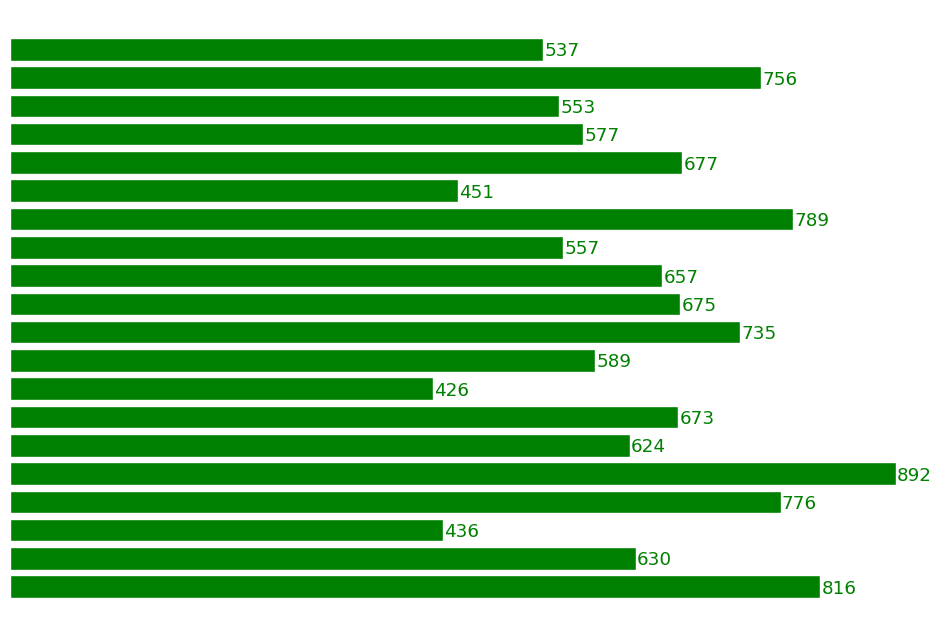

In [76]:
main='/kaggle/working/dataset/dataset'

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count


keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.axis('off')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Đường dẫn tới thư mục chứa dataset
dataset_path = '/kaggle/working/dataset/dataset'

# Lấy danh sách tên các thư mục con
subdirectories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Chia từng thư mục con thành train set, validation set, và test set
for subdir in subdirectories:
    subdir_path = os.path.join(dataset_path, subdir)

    # Lấy danh sách các file trong thư mục con
    file_names = os.listdir(subdir_path)
    print(subdir)

    # Chia thành train set, validation set, và test set
    train_set, temp_set = train_test_split(file_names, test_size=0.3, random_state=42)
    valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

    # Đường dẫn tới thư mục train set, validation set, và test set cho thư mục con
    train_set_path = os.path.join('/kaggle/working/train', subdir)
    valid_set_path = os.path.join('/kaggle/working/valid', subdir)
    test_set_path = os.path.join('/kaggle/working/test', subdir)

    # Tạo thư mục train set, validation set, và test set nếu chưa tồn tại
    os.makedirs(train_set_path, exist_ok=True)
    os.makedirs(valid_set_path, exist_ok=True)
    os.makedirs(test_set_path, exist_ok=True)
    print("Directories created:", train_set_path, valid_set_path, test_set_path)

    # Di chuyển các file của train set vào thư mục train_set_path
    for file_name in train_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(train_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

    # Di chuyển các file của validation set vào thư mục valid_set_path
    for file_name in valid_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(valid_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

    # Di chuyển các file của test set vào thư mục test_set_path
    for file_name in test_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(test_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


banana
Directories created: /kaggle/working/train/banana /kaggle/working/valid/banana /kaggle/working/test/banana
bread
Directories created: /kaggle/working/train/bread /kaggle/working/valid/bread /kaggle/working/test/bread
corn
Directories created: /kaggle/working/train/corn /kaggle/working/valid/corn /kaggle/working/test/corn
potato
Directories created: /kaggle/working/train/potato /kaggle/working/valid/potato /kaggle/working/test/potato
lettuce
Directories created: /kaggle/working/train/lettuce /kaggle/working/valid/lettuce /kaggle/working/test/lettuce
crab
Directories created: /kaggle/working/train/crab /kaggle/working/valid/crab /kaggle/working/test/crab
carrot
Directories created: /kaggle/working/train/carrot /kaggle/working/valid/carrot /kaggle/working/test/carrot
tofu
Directories created: /kaggle/working/train/tofu /kaggle/working/valid/tofu /kaggle/working/test/tofu
cheese
Directories created: /kaggle/working/train/cheese /kaggle/working/valid/cheese /kaggle/working/test/chees

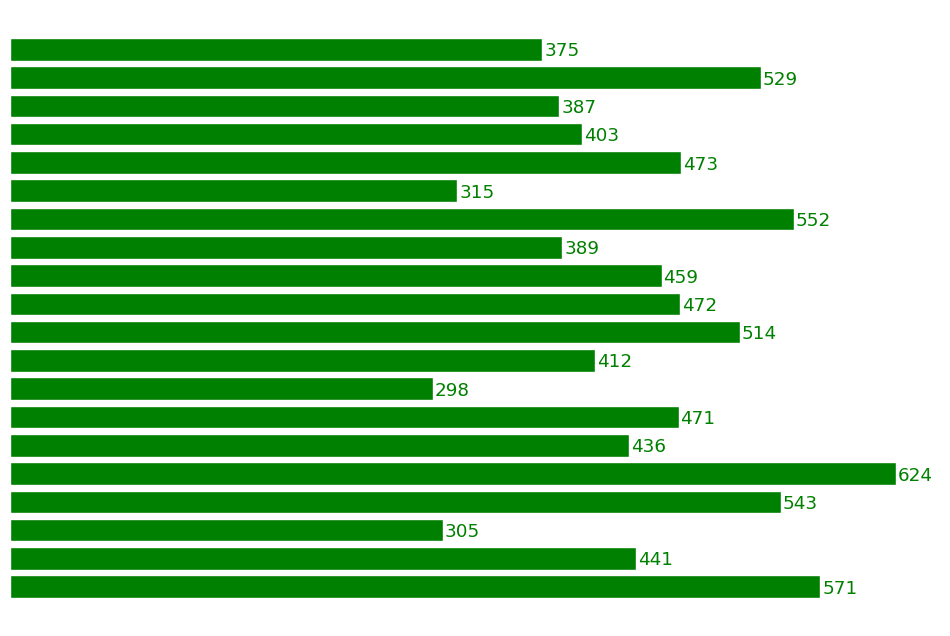

In [77]:
main='/kaggle/working/train/'

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count


keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.axis('off')
plt.show()

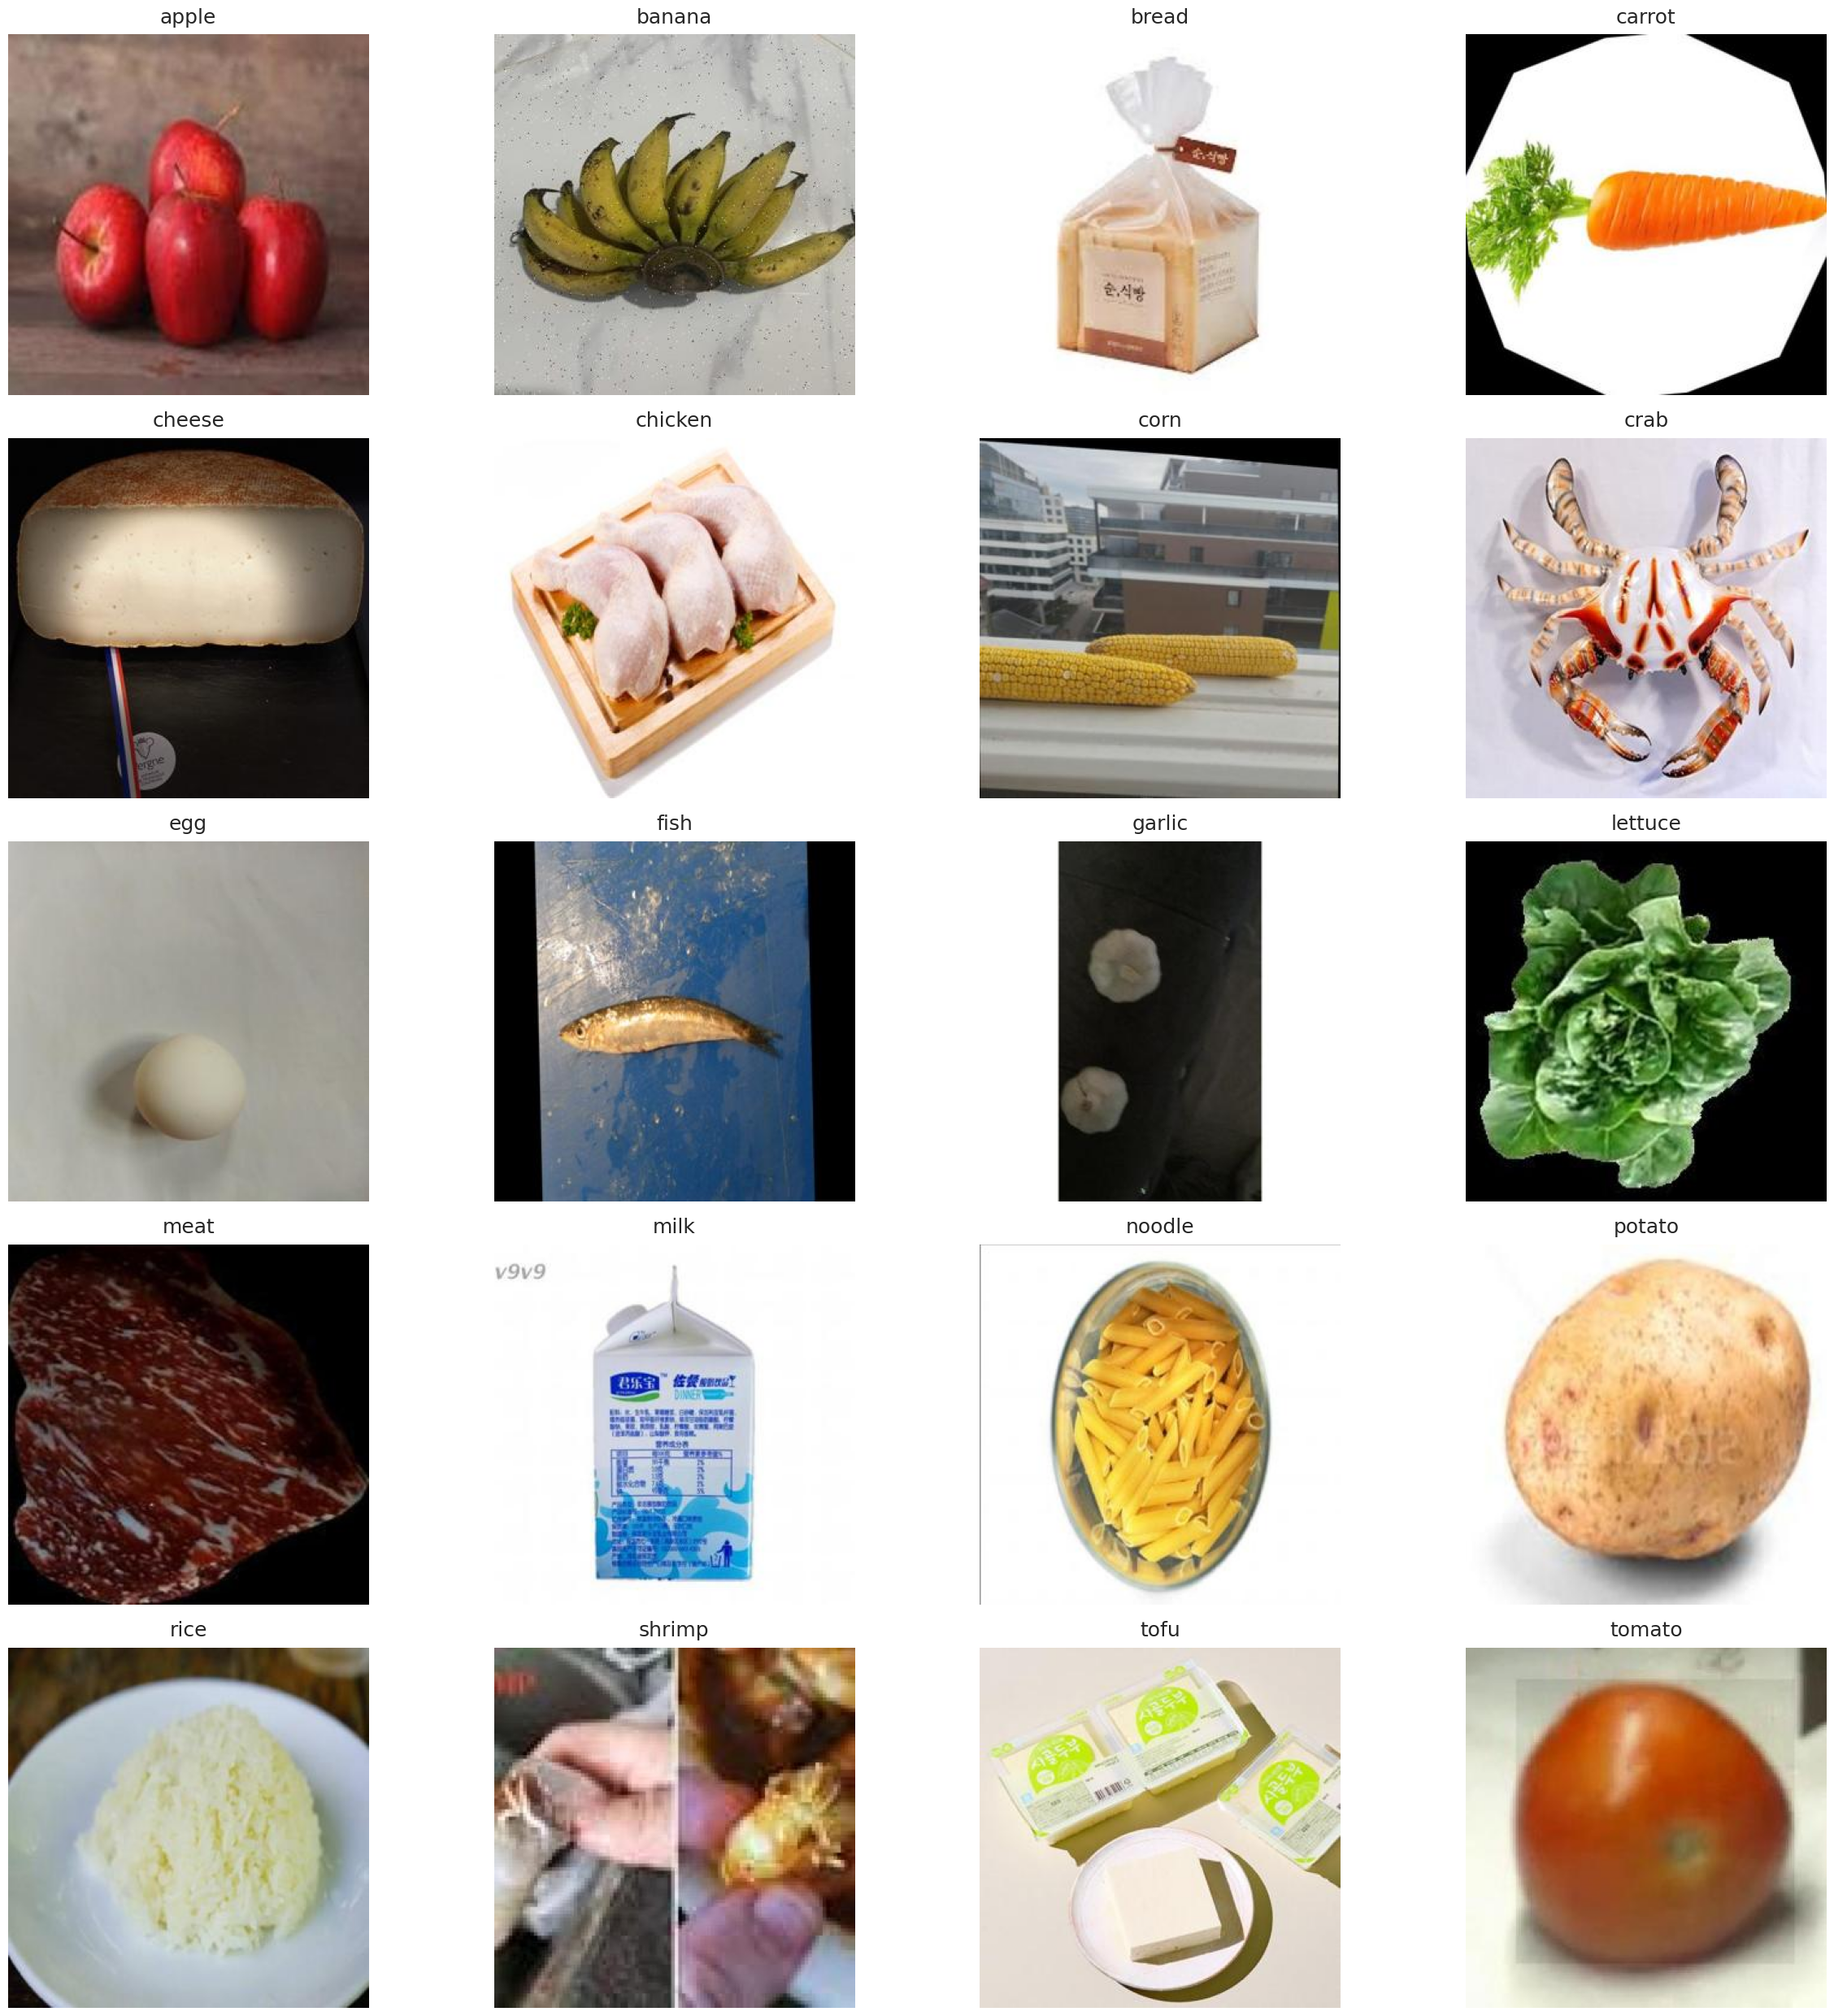

In [73]:
import random

train_folder = '/kaggle/working/train/'
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    plt.axis('off')

plt.tight_layout()

# <b> MODEL TRAINING </b>

## TraingingArguments

In [21]:
n_classes = 20
batch_size = 32
learning_rate = 0.0001
momentum = 0.9
epochs = 20

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 299, 299

train_data_dir = '/kaggle/working/train'

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_data_dir = '/kaggle/working/valid'

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 8969 images belonging to 20 classes.
Found 1924 images belonging to 20 classes.


In [23]:
class_map = train_generator.class_indices
class_map

{'apple': 0,
 'banana': 1,
 'bread': 2,
 'carrot': 3,
 'cheese': 4,
 'chicken': 5,
 'corn': 6,
 'crab': 7,
 'egg': 8,
 'fish': 9,
 'garlic': 10,
 'lettuce': 11,
 'meat': 12,
 'milk': 13,
 'noodle': 14,
 'potato': 15,
 'rice': 16,
 'shrimp': 17,
 'tofu': 18,
 'tomato': 19}

In [24]:
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(val_generator.filenames)

In [25]:
steps_per_epoch = total_train_samples // batch_size
validation_steps = total_validation_samples // batch_size

## Training the model

In [26]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

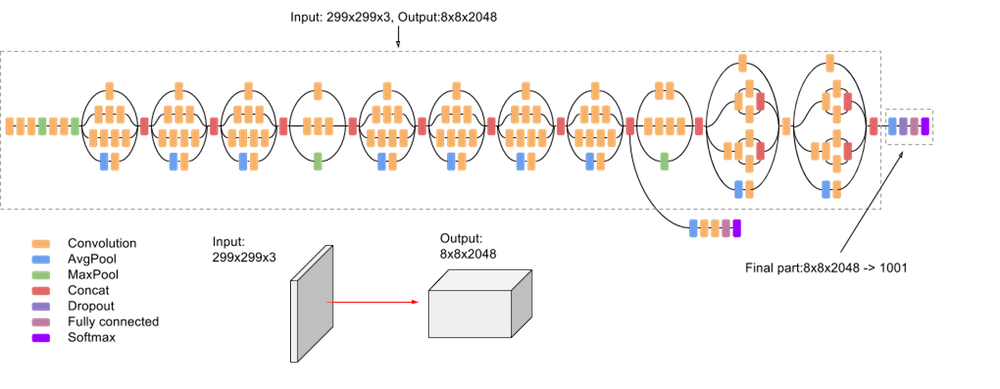

In [27]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=learning_rate, momentum=momentum), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, None, None, 32)       96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, None, None, 32)       0         ['batch_normalization_94

In [28]:
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

/tmp/ipykernel_42/1820393811.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
280/280 [==============================] - ETA: 0s - loss: 0.5654 - accuracy: 0.8864
Epoch 1: val_loss improved from inf to 1.07569, saving model to v1_inceptionV3
280/280 [==============================] - 226s 739ms/step - loss: 0.5654 - accuracy: 0.8864 - val_loss: 1.0757 - val_accuracy: 0.7807
Epoch 2/20
280/280 [==============================] - ETA: 0s - loss: 0.2205 - accuracy: 0.9672
Epoch 2: val_loss improved from 1.07569 to 0.30644, saving model to v1_inceptionV3
280/280 [==============================] - 205s 730ms/step - loss: 0.2205 - accuracy: 0.9672 - val_loss: 0.3064 - val_accuracy: 0.9365
Epoch 3/20
280/280 [==============================] - ETA: 0s - loss: 0.1404 - accuracy: 0.9797
Epoch 3: val_loss improved from 0.30644 to 0.15670, saving model to v1_inceptionV3
280/280 [==============================] - 205s 733ms/step - loss: 0.1404 - accuracy: 0.9797 - val_loss: 0.1567 - val_accuracy: 0.9708
Epoch 4/20
280/280 [==============================] - ETA: 0s 

## Saving the model

In [30]:
model.save('model_v1_inceptionV3.h5')

## Accuracy and Loss curves

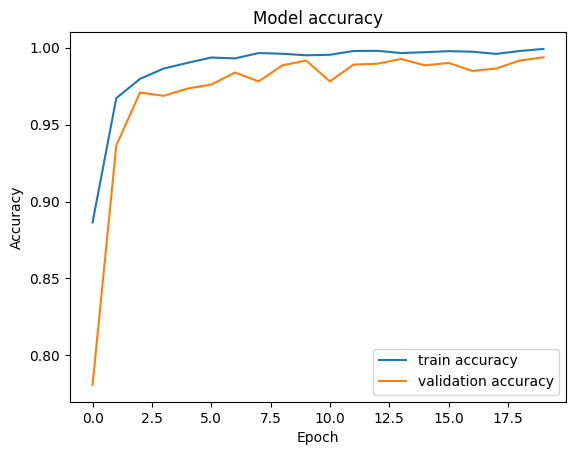

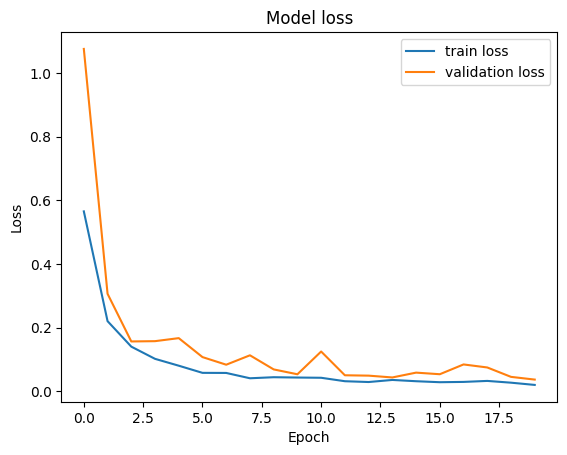

In [35]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)

# <b> PREDICTIONS </b>

## Load the model

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

In [71]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


## Testing model on test set

In [40]:
test_data_dir = '/kaggle/working/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1933 images belonging to 20 classes.


In [41]:
scores = model.evaluate_generator(test_generator)

print("Test Accuracy: {:.3f}".format(scores[1]))

Test Accuracy: 0.994


## Function to predict single image or predict all images from a directory

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [58]:
category={
    0: ['apple','Apple'], 1: ['banana','Banana'], 2: ['bread','Bread'], 3: ['carrot', 'Carrot'], 4: ['cheese', 'Cheese'],
    5: ['chicken','Chicken'], 6:['corn','Corn'], 7: ['crab','Crab'], 8: ['egg','Egg'], 9:['fish', 'Fish'], 10: ['garlic', 'Garlic'], 
    11: ['lettuce', 'Lettuce'], 12: ['meat', 'Meat'], 13: ['milk','Milk'], 14:['noodle', 'Noodle'], 15: ['potato','Potato'], 
    16: ['rice', 'Rice'], 17: ['shrimp', 'Shrimp'], 18: ['tofu', 'Tofu'], 19: ['tomato', 'Tomato']
}

In [68]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)
        plt.axis('off')

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

- <h3> Single image prediction </h3>

1/1 [==============================] - 0s 22ms/step


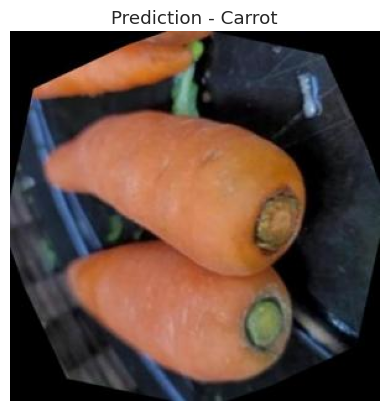

In [65]:
predict_image('/kaggle/working/test/carrot/125.jpg',model)

1/1 [==============================] - 0s 21ms/step


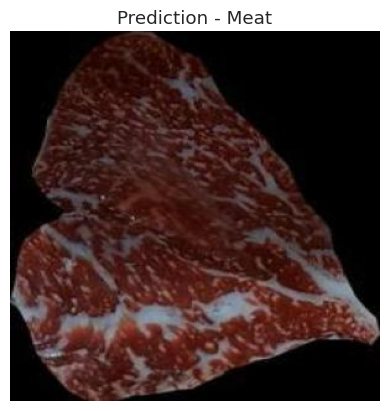

In [66]:
predict_image('/kaggle/working/test/meat/221.jpg',model)

1/1 [==============================] - 1s 1s/step


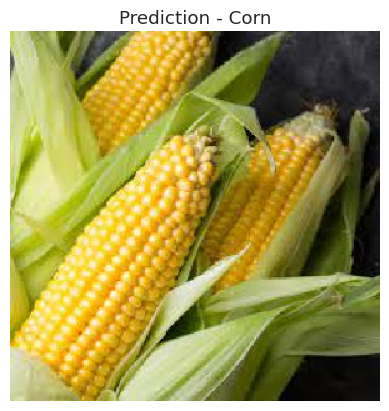

In [72]:
predict_image('/kaggle/input/corn123/corn.jpeg',model)

- <h3> Predicting category </h3>

1/1 [==============================] - 0s 21ms/step
Accuracy of Test : 0.96 (81/84)


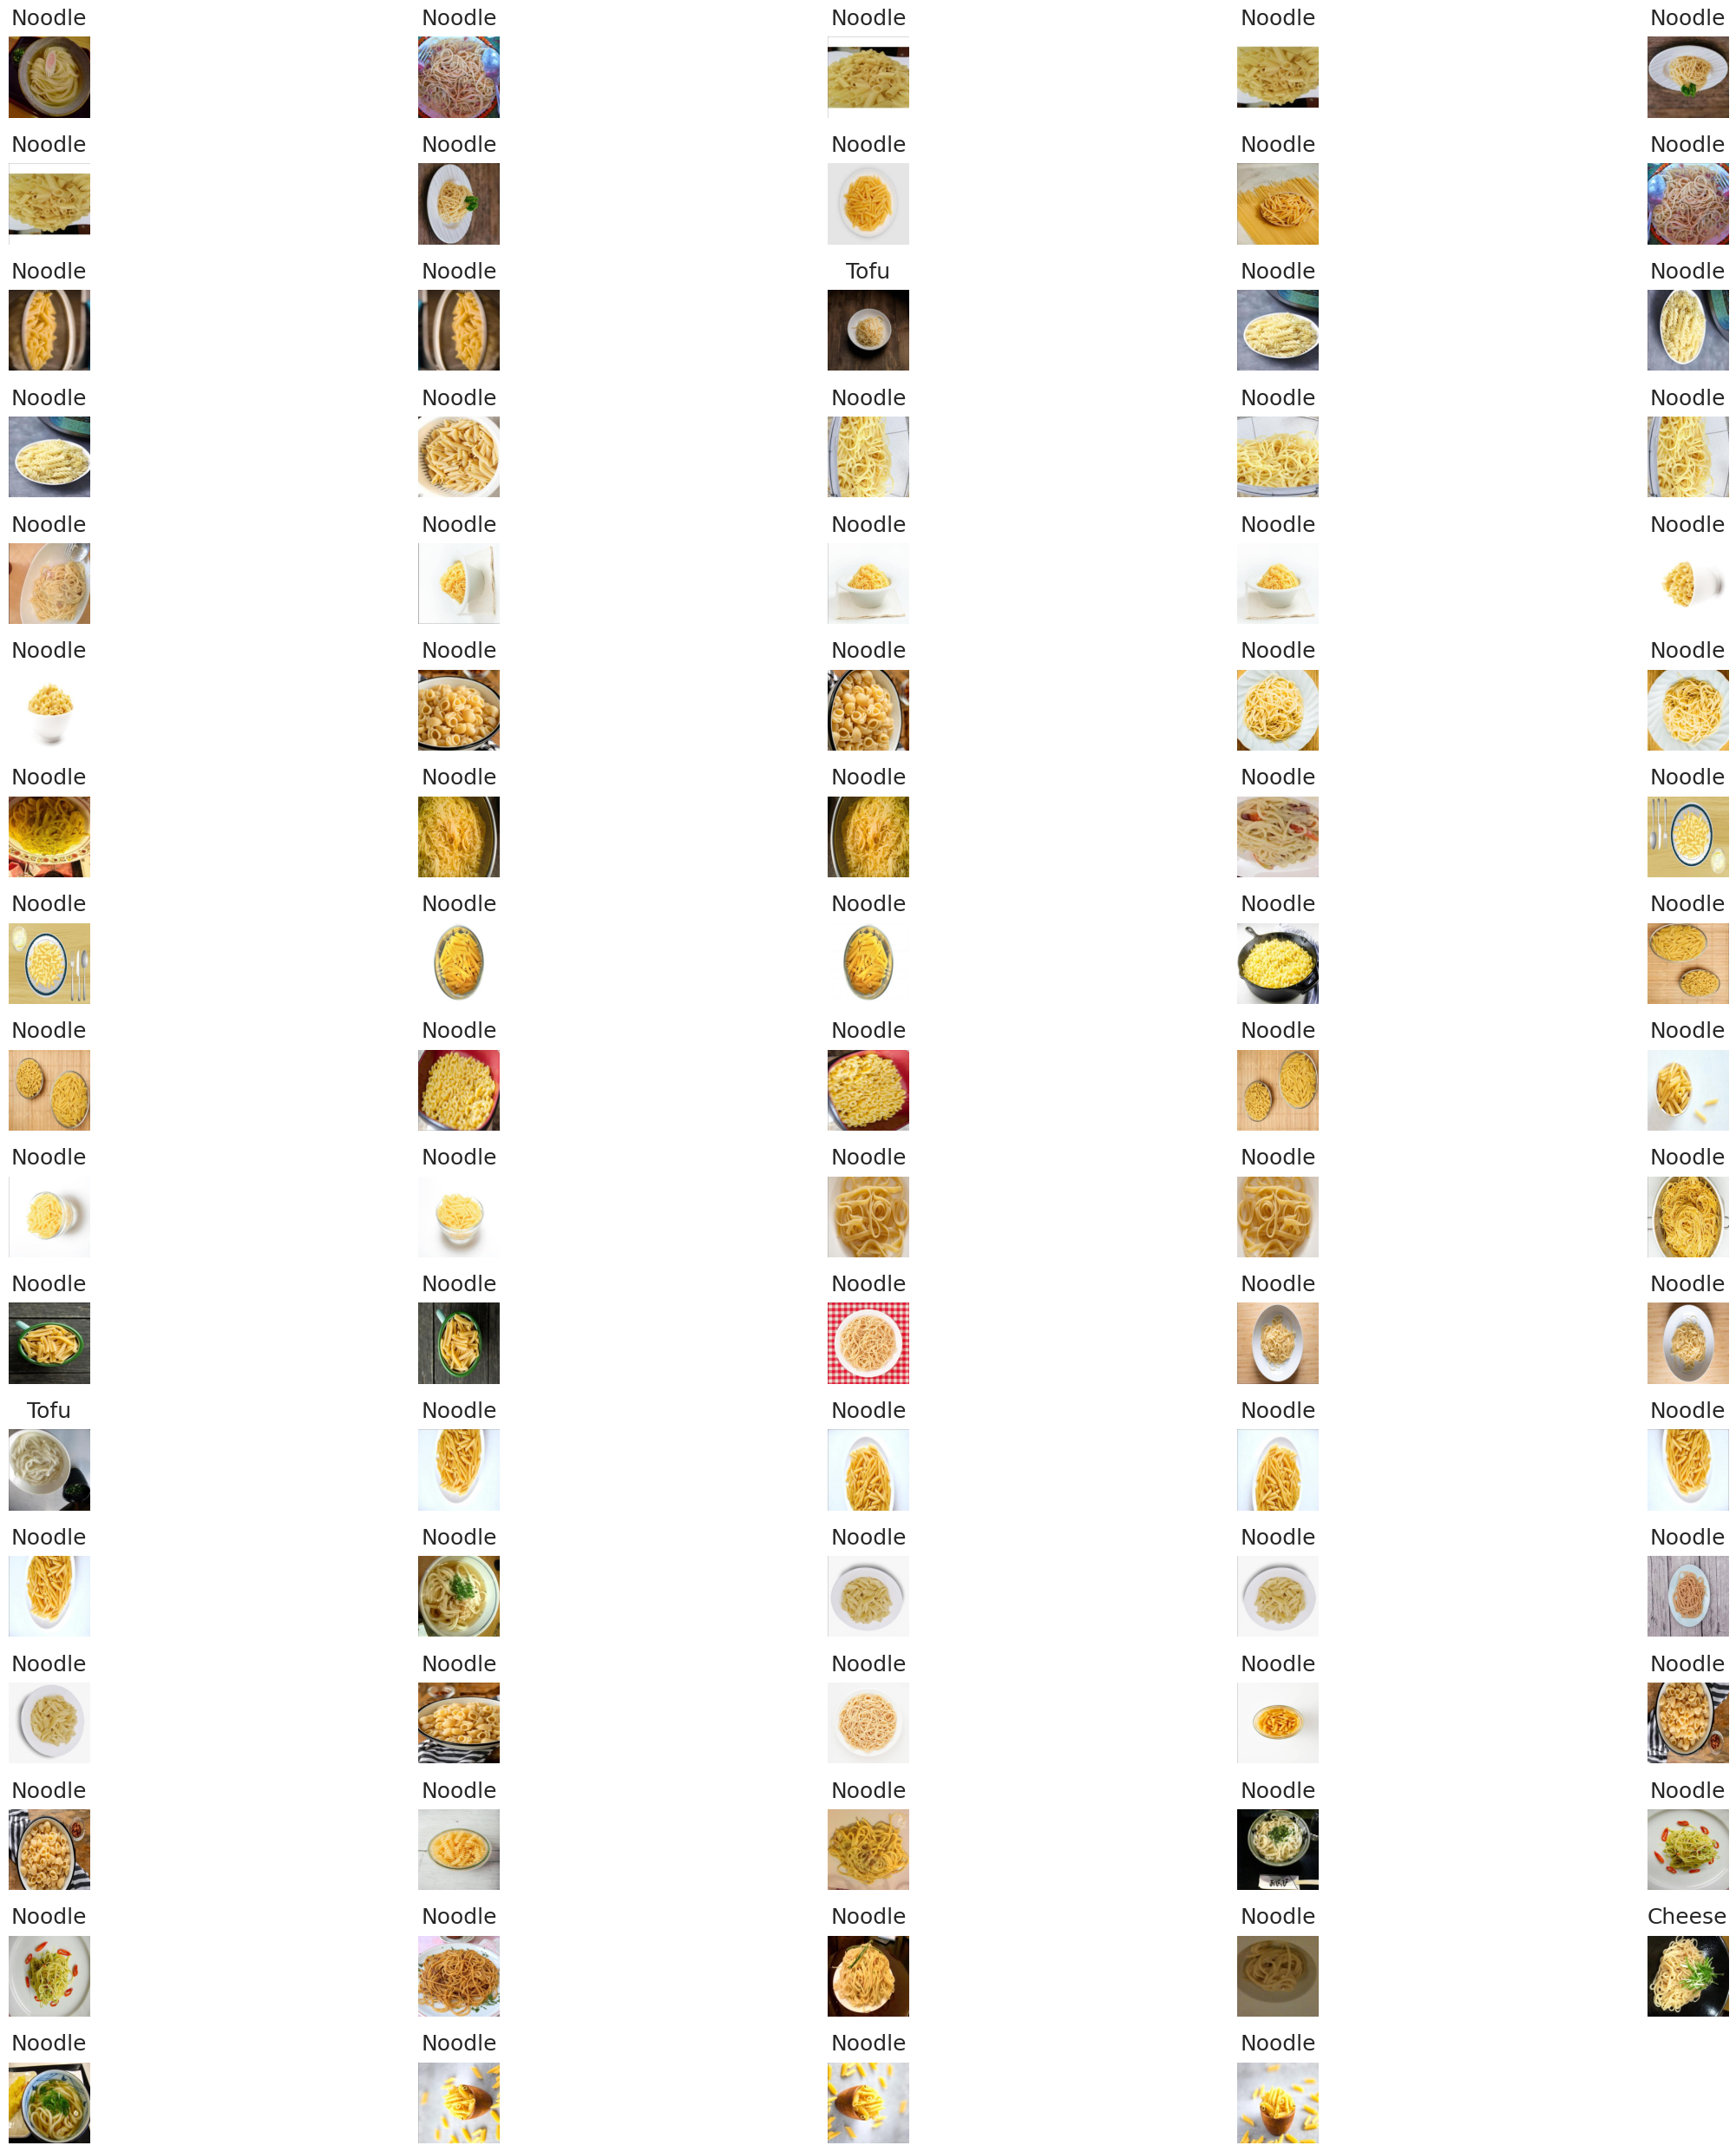

In [69]:
predict_dir("/kaggle/working/test/noodle",model)

In [48]:
from sklearn.metrics import confusion_matrix
import itertools

img_width, img_height = 299, 299

def labels_confusion_matrix():
    folder_path="/kaggle/working/test"

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(img_height, img_width))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real, predicted, category):
    cmap = "viridis"

    # Lấy danh sách nhãn từ dictionary 'category'
    labels = [category[i][1] for i in range(len(category))]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    sns.set(font_scale=1.1)  # for label size
    plt.figure(figsize=(12, 8))  # Thay đổi kích thước của hình ảnh

    # Điều chỉnh kích thước biểu đồ bằng param 'cbar_kws'
    s = sns.heatmap(df_cm, annot=True, fmt='d', cmap=cmap, cbar_kws={"shrink": 0.6})  # Sử dụng fmt='d'
    
    plt.xticks(rotation=90)

    # Tùy chọn, đặt tỷ lệ khung hình cho matrix
    s.set_aspect('equal', adjustable='box')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

1/1 [==============================] - 0s 24ms/step


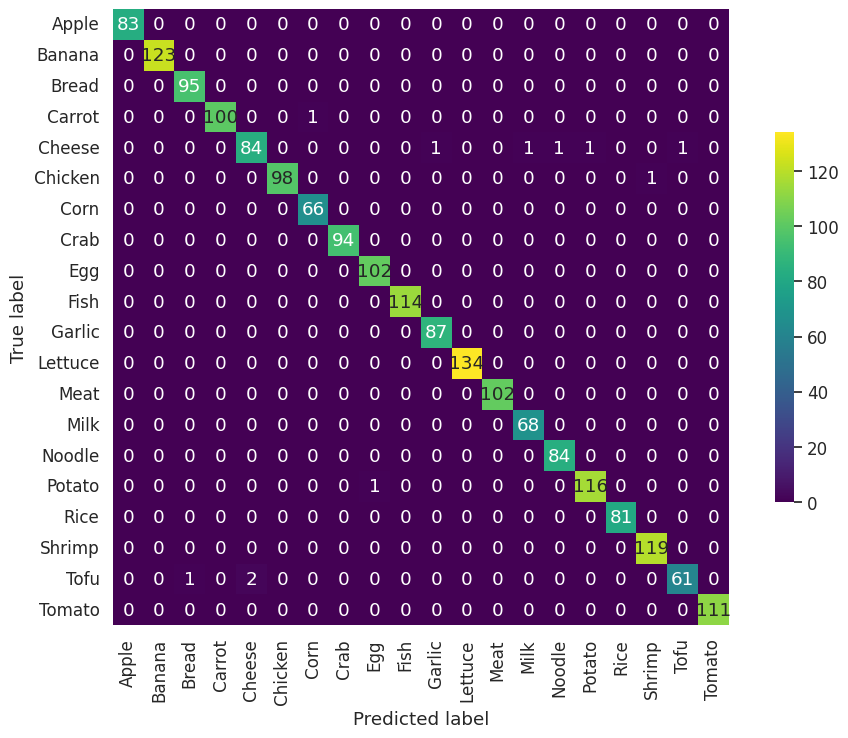

In [49]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred, category)